In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

%matplotlib inline
sns.set_style('white')

## King County (Seattle) Housing Data

We'll be looking at King County housing data, and preparing the data for later analysis. I'll look at the data with a number of univariate and bivariate techniques, then run principle component analysis and pick some good features to bring into a regression later on.

https://www.kaggle.com/harlfoxem/housesalesprediction/data

In [2]:
housing = pd.read_csv('kc_house_data.csv')
housing.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df = housing.loc[(housing['zipcode']==98108) | (housing['zipcode']==98112),
    ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'yr_built', 'zipcode']
]

#The same dataframe, without zip, for correlation analysis.
df_nozip = df.loc[:, 'price':'yr_built']

Price will be our outcome variable. We'll look at 

**bedrooms:** Number of Bedrooms/House: numeric

**sqft_living:** Square footage of the home: numeric

**sqft_lot:** Square footage of the lot: numeric

**condition:** How good the condition is: numeric

**grade:** Overall grade given to the housing unit, based on King County grading system: numeric

**yr_built:** Built Year: numeric

**zipcode:** Zip: numeric


In [4]:
df.head(5)

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode
27,667000.0,3,1400,1581,5,8,1909,98112
113,329950.0,3,2080,5969,3,7,1971,98108
196,423000.0,4,1970,6480,5,7,1920,98108
234,475000.0,3,2480,5280,5,7,1947,98108
260,780000.0,3,1660,4400,3,8,1911,98112


In [5]:
df_nozip.describe()

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built
count,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,7.930671e+05,3.384615,2174.114286,5078.081319,3.470330,7.859341,1949.951648
std,5.874607e+05,1.100353,1023.622037,2797.889570,0.744065,1.263690,37.645370
min,9.000000e+04,1.000000,420.000000,520.000000,1.000000,5.000000,1900.000000
25%,3.800000e+05,3.000000,1460.000000,3620.000000,3.000000,7.000000,1919.000000
50%,6.000000e+05,3.000000,1960.000000,4800.000000,3.000000,8.000000,1941.000000
75%,1.035000e+06,4.000000,2625.000000,6000.000000,4.000000,9.000000,1993.000000
max,3.400000e+06,8.000000,7710.000000,30120.000000,5.000000,12.000000,2015.000000


/Users/maxcalabro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


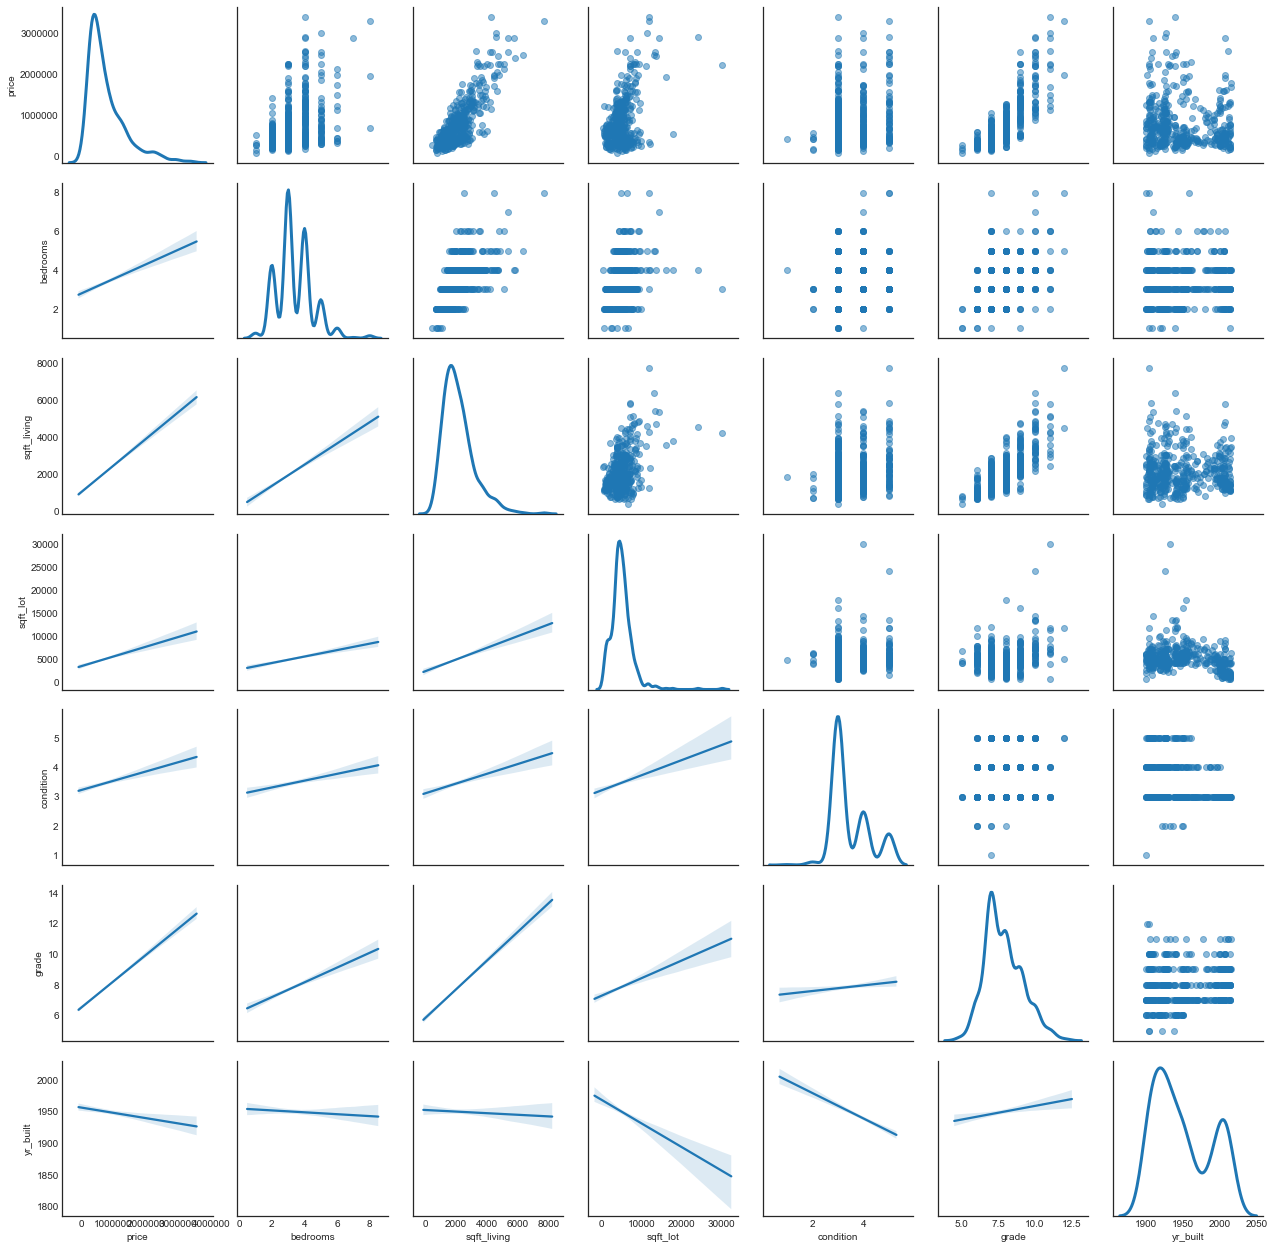

In [6]:
g = sns.PairGrid(df_nozip, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)

plt.show()

Comparing all the variables except Zip Code. Some correlations are fairly clear: Price is strongly dependent on bedrooms, sqft_living, and grade. Less so on yr_built and condition. 

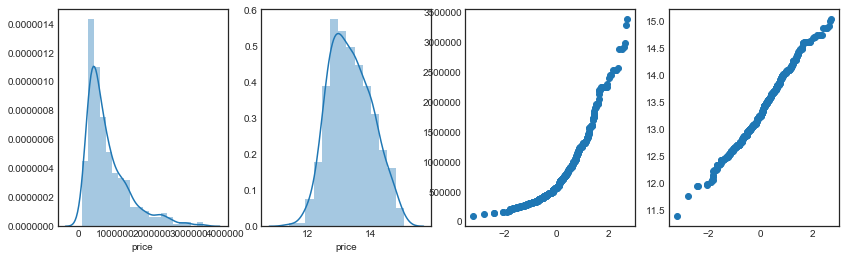

In [7]:
norm = sorted(np.random.normal(0, 1, 455))


f, ax = plt.subplots(figsize=(14,4))
plt.subplot(1, 4, 1)
sns.distplot(df.price)
plt.subplot(1, 4, 2)
sns.distplot(np.log(df.price))
plt.subplot(1, 4, 3)
plt.scatter(norm, sorted(df.price))
plt.subplot(1, 4, 4)
plt.scatter(norm, sorted(np.log(df.price)))
plt.show()

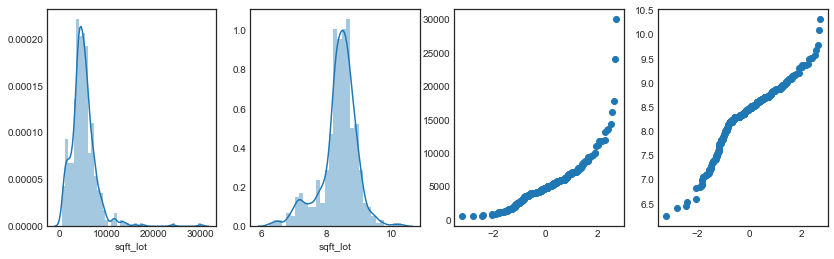

In [8]:
f, ax = plt.subplots(figsize=(14,4))
plt.subplot(1, 4, 1)
sns.distplot(df.sqft_lot)
plt.subplot(1, 4, 2)
sns.distplot(np.log(df.sqft_lot))
plt.subplot(1, 4, 3)
plt.scatter(norm, sorted(df.sqft_lot))
plt.subplot(1, 4, 4)
plt.scatter(norm, sorted(np.log(df.sqft_lot)))
plt.show()

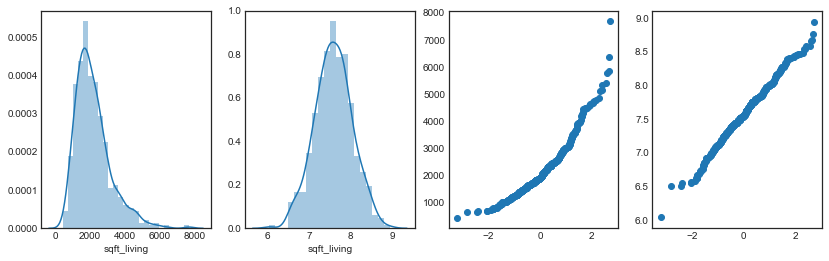

In [9]:
f, ax = plt.subplots(figsize=(14,4))
plt.subplot(1, 4, 1)
sns.distplot(df.sqft_living)
plt.subplot(1, 4, 2)
sns.distplot(np.log(df.sqft_living))
plt.subplot(1, 4, 3)
plt.scatter(norm, sorted(df.sqft_living))
plt.subplot(1, 4, 4)
plt.scatter(norm, sorted(np.log(df.sqft_living)))
plt.show()

Taking the log of some of these variables might help out a bit later on. (I didn't really get into this too much - let's talk about it)

                price  bedrooms  sqft_living  sqft_lot  condition     grade  \
price        1.000000  0.403006     0.824125  0.447125   0.249731  0.802807   
bedrooms     0.403006  1.000000     0.613684  0.276926   0.171352  0.420751   
sqft_living  0.824125  0.613684     1.000000  0.465139   0.227394  0.757385   
sqft_lot     0.447125  0.276926     0.465139  1.000000   0.193618  0.255488   
condition    0.249731  0.171352     0.227394  0.193618   1.000000  0.107995   
grade        0.802807  0.420751     0.757385  0.255488   0.107995  1.000000   
yr_built    -0.130832 -0.043791    -0.034259 -0.278434  -0.395591  0.144363   

             yr_built  
price       -0.130832  
bedrooms    -0.043791  
sqft_living -0.034259  
sqft_lot    -0.278434  
condition   -0.395591  
grade        0.144363  
yr_built     1.000000  


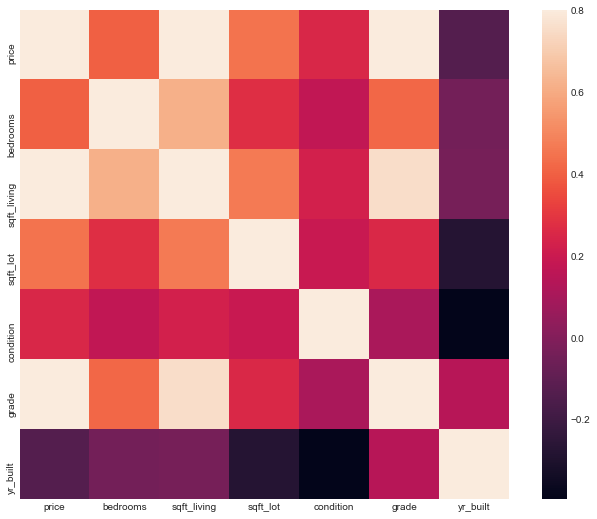

In [10]:
corrmat = df_nozip.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

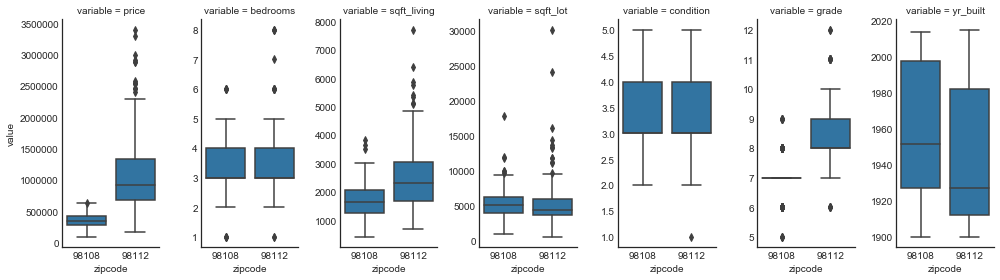

In [11]:
df_long = df
df_long = pd.melt(df_long, id_vars=['zipcode'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5, sharey=False)
g = g.map(sns.boxplot, "zipcode", "value")
plt.show()

Moving on to PCA -- let's reduce the number of features. Since Price will be our outcome variable, we won't include in the dimension reduction analysis.

In [12]:
df_noprice = df.loc[:, 'bedrooms':'yr_built']
#df_noprice.sqft_living = np.log(df_noprice.sqft_living)
#df_noprice.sqft_lot = np.log(df_noprice.sqft_lot)

In [13]:
X = StandardScaler().fit_transform(df_noprice)
Xt = X.T
Cx = np.cov(Xt)

In [14]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [15]:
# Inspecting the eigenvalues and eigenvectors. From example notebook.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 6).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.4610353 ]
 [-0.5758822 ]
 [-0.38819864]
 [-0.24814207]
 [-0.47995437]
 [ 0.1147923 ]]
Eigenvalue 1: 2.546476165531576
----------------------------------------
Eigenvector 2: 
[[-0.11490067]
 [-0.15830118]
 [ 0.24317395]
 [ 0.53028553]
 [-0.34057095]
 [-0.71092453]]
Eigenvalue 2: 1.4479477535110639
----------------------------------------
Eigenvector 3: 
[[-0.23636869]
 [ 0.78311401]
 [-0.1702176 ]
 [-0.03543284]
 [-0.54675735]
 [ 0.0410996 ]]
Eigenvalue 3: 0.1731684730888004
----------------------------------------
Eigenvector 4: 
[[ 0.15001903]
 [ 0.00954029]
 [-0.74095259]
 [ 0.62681825]
 [ 0.14765804]
 [ 0.11699795]]
Eigenvalue 4: 0.7688899595185533
----------------------------------------
Eigenvector 5: 
[[-0.8095784 ]
 [ 0.08628139]
 [ 0.20181978]
 [ 0.29651635]
 [ 0.4070694 ]
 [ 0.20683248]]
Eigenvalue 5: 0.6037561735046323
----------------------------------------
Eigenvector 6: 
[[ 0.20112493]
 [-0.14999126]
 [ 0.41406793]
 [ 0.41850236]
 [-0.40890493]
 [ 0.

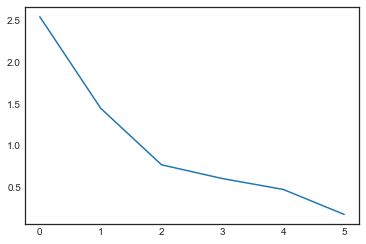

In [16]:
plt.plot(sorted(eig_val_cov, reverse=True))
plt.show()

Based on this analysis, Eigenvector 1 from PCA contains the most information, and includes the variables that trend together: number of bedrooms, square footage, grade. Basically, this is a "Size" variable. EV2 also contains a lot of information, and is closely related to condition and year built. This is a "How Nice" variable. Since location isn't included in this analysis (zip code isn't a useful format for analysis), this makes sense. When buying a house, the three most general questions are: Where? How big? Is it nice?

Moving forward in the analysis, I would probably just stick with these two principle components: EV1 and EV2. This makes sense using either the "All eigenvalues > 1" method, or the elbow method based on the plot. It gives us the information of 4 of our original variables (out of 6, for a total of 68% of the information) for the price of 2. 

**10 Extra Features**

Original features:
bedrooms
sqft_living
sqft_lot
condition
grade
yr_built
zipcode (convert this to 0 for 98108, 1 for 98112

In addition, let's try these ten new features:
sqrt(sqft_living)
bedrooms * sqft_living
condition / sqft_living
sqft_lot^2
sqft_lot * zipcode
condition * grade
yr_built * condition
bedrooms * yr_built
grade / bedrooms
log(grade)

Make 10 new features (including combining variables)
Run PCA on 17 features
Choose best features based on that
Choose top five features by hand

In [17]:
df_full = df_nozip = df.loc[:, 'price':]
df_full.zipcode.replace([98108, 98112], [0, 1], inplace=True)

# New Features
df_full['sqrt_living'] = np.sqrt(df_full.sqft_living)
df_full['beds_x_living'] = df_full.bedrooms * df_full.sqft_living
df_full['cond_d_living'] = df_full.condition / df_full.sqft_living
df_full['lot_x_lot'] = df_full.sqft_lot ** 2
df_full['lot_x_zip'] = df_full.sqft_lot * df_full.zipcode
df_full['cond_x_grade'] = df_full.condition * df_full.grade
df_full['yr_x_cond'] = df_full.yr_built * df_full.condition
df_full['beds_x_yr'] = df_full.bedrooms * df_full.yr_built
df_full['grade_d_beds'] = df_full.grade / df_full.bedrooms
df_full['log_grade'] = np.log(df_full.grade)

In [18]:
df_full.head(5)

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,sqrt_living,beds_x_living,cond_d_living,lot_x_lot,lot_x_zip,cond_x_grade,yr_x_cond,beds_x_yr,grade_d_beds,log_grade
27,667000.0,3,1400,1581,5,8,1909,1,37.416574,4200,0.003571,2499561,1581,40,9545,5727,2.666667,2.079442
113,329950.0,3,2080,5969,3,7,1971,0,45.607017,6240,0.001442,35628961,0,21,5913,5913,2.333333,1.945910
196,423000.0,4,1970,6480,5,7,1920,0,44.384682,7880,0.002538,41990400,0,35,9600,7680,1.750000,1.945910
234,475000.0,3,2480,5280,5,7,1947,0,49.799598,7440,0.002016,27878400,0,35,9735,5841,2.333333,1.945910
260,780000.0,3,1660,4400,3,8,1911,1,40.743098,4980,0.001807,19360000,4400,24,5733,5733,2.666667,2.079442


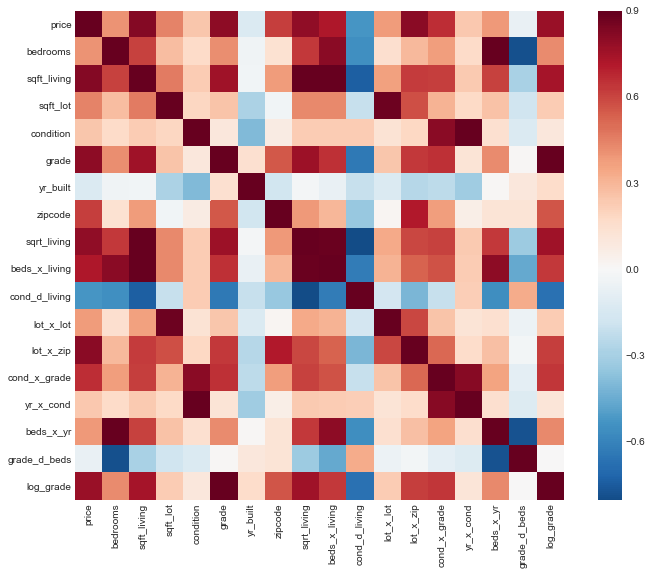

In [19]:
corrmat = df_full.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.9, square=True, center=0, cmap="RdBu_r")
plt.show()

### PCA to determine best of the 17 total features

In [24]:
X = StandardScaler().fit_transform(df_full.loc[:, 'bedrooms':])


sklearn_pca = PCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X)

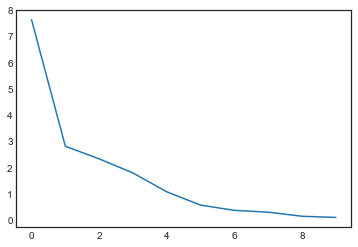

In [27]:
eig_vals = sklearn_pca.explained_variance_
eig_vecs = sklearn_pca.components_

plt.plot(eig_vals)
plt.show()

In [32]:
ratios = sklearn_pca.explained_variance_ratio_
print(eig_vals)
print(ratios)
print(sum(ratios[:4]))

[ 7.61834265  2.79429477  2.31327762  1.77433075  1.05501478  0.54890954
  0.34966872  0.27979923  0.12367766  0.08019599]
[ 0.44715288  0.16400903  0.13577609  0.10414301  0.0619233   0.03221783
  0.02052354  0.0164226   0.00725917  0.00470704]
0.851081006992


It looks like there is a fairly steep cutoff after the 4th eigenvalue. If we use 4 of the principle components in our analysis, we will retain (.44+.16+.14+.10) = 85% of the data. What do these components contain from the original information?

In [41]:
print(eig_vecs[:4])

[[  2.68942058e-01   3.37770150e-01   1.86554558e-01   1.22039103e-01
    2.96255229e-01  -3.59709179e-02   1.71793671e-01   3.39795675e-01
    3.29609012e-01  -2.54215969e-01   1.57632484e-01   2.61658535e-01
    2.66022074e-01   1.22578554e-01   2.66438012e-01  -1.42717934e-01
    2.93459022e-01]
 [ -1.21479500e-01  -5.83402845e-02   1.41882444e-01   5.23562904e-01
   -9.47439865e-02  -3.40166196e-01  -3.91593556e-03  -7.68761881e-02
   -6.77026187e-02   3.36869868e-01   1.24062736e-01   7.96898616e-02
    3.42276656e-01   5.10692159e-01  -1.42054231e-01   8.91156311e-02
   -1.05298971e-01]
 [ -3.81417154e-01   3.25084092e-02  -4.26822729e-03  -1.18641814e-01
    2.72958759e-01   6.32004660e-02   3.58673141e-01   1.91934541e-02
   -1.32865460e-01  -3.39288234e-02   9.46206951e-02   2.88244111e-01
    6.70030831e-02  -1.17347598e-01  -3.79868833e-01   5.34680482e-01
    2.69386166e-01]
 [ -4.46260718e-02   6.31691909e-03   5.87185978e-01  -1.91098445e-01
   -1.54119849e-01  -1.6359546

Otherwise, let's look at the correlations to price and determine some features by hand.

In [42]:
corrmat.price.sort_values()

cond_d_living   -0.528892
yr_built        -0.130832
grade_d_beds    -0.064529
yr_x_cond        0.245497
condition        0.249731
lot_x_lot        0.383189
beds_x_yr        0.393327
bedrooms         0.403006
sqft_lot         0.447125
zipcode          0.619793
cond_x_grade     0.661878
beds_x_living    0.721105
log_grade        0.779109
sqrt_living      0.796741
grade            0.802807
lot_x_zip        0.813319
sqft_living      0.824125
price            1.000000
Name: price, dtype: float64

There are a few variables here with quite high correlation with price. Ideally, our choices would have high correlation with our outcome variable but not with each other. We could choose:

sqft_living, lot_x_zip, cond_x_grade, beds_x_yr, and grade. 

This captures each of the original variables, and uses variables that have strong correlation with price, our outcome variable. Or, if we only wanted to choose from our original features and exclude the manufactured ones, the best would be:

sqft_living, grade, and zipcode.